In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
data=pd.read_excel('dataset_new.xlsx',sheet_name='train')
data

,KodeBarang,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,cluster
0,04121,7,9,6,9,40,0,3,0,7,...,67,77,11,57,43,50,37,21,136,0
1,18031,230,227,279,153,190,256,267,305,238,...,336,153,103,221,360,280,240,120,548,1
2,04161,102,50,45,41,71,11,52,14,66,...,21,20,7,33,21,28,30,10,18,0
3,04162,272,155,214,226,268,110,204,253,193,...,102,118,120,211,292,105,108,101,117,1
4,04163,28,28,29,52,44,21,47,15,24,...,18,23,22,16,22,31,36,17,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,04157,55,64,44,61,30,1,24,37,67,...,20,10,300,34,7,7,6,4,21,0
102,18104,46,295,83,112,70,40,18,140,97,...,47,54,27,15,57,132,66,34,146,0
103,18106,200,204,0,2,10,7,0,27,74,...,15,136,15,15,14,131,84,12,14,0
104,18092,297,418,329,70,498,59,298,376,259,...,450,498,254,260,336,493,438,408,322,1


In [3]:
clusters=data['cluster']

In [4]:
data_test = pd.read_excel('dataset_new.xlsx',sheet_name='test')
data_test

,KodeBarang,bulan 1,bulan 2,bulan 3,bulan 4,bulan 5,bulan 6
0,04121,5,12,8,14,40,40
1,18031,573,340,441,270,488,240
2,04161,27,5,26,34,40,56
3,04162,162,82,72,98,126,120
4,04163,23,20,9,5,22,6
...,...,...,...,...,...,...,...
101,04157,138,14,12,21,25,10
102,18104,60,103,39,87,276,40
103,18106,16,7,65,24,13,27
104,18092,721,184,150,488,648,149


In [5]:
data_test['cluster'] = clusters
data_test

,KodeBarang,bulan 1,bulan 2,bulan 3,bulan 4,bulan 5,bulan 6,cluster
0,04121,5,12,8,14,40,40,0
1,18031,573,340,441,270,488,240,1
2,04161,27,5,26,34,40,56,0
3,04162,162,82,72,98,126,120,1
4,04163,23,20,9,5,22,6,0
...,...,...,...,...,...,...,...,...
101,04157,138,14,12,21,25,10,0
102,18104,60,103,39,87,276,40,0
103,18106,16,7,65,24,13,27,0
104,18092,721,184,150,488,648,149,1


In [6]:
data_test.drop(['bulan 4','bulan 5','bulan 6'],axis=1,inplace=True)

In [7]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [8]:
len(data['cluster'].unique())

4

In [9]:
#now lets take clusters
c0 = data.query("cluster == 0")
print("Jumlah Produk:")
print(c0['KodeBarang'].size)
c1 = data.query("cluster == 1")
print("Jumlah Produk:")
print(c1['KodeBarang'].size)
c2 = data.query("cluster == 2")
print("Jumlah Produk:")
print(c2['KodeBarang'].size)
c3 = data.query("cluster == 3")
print("Jumlah Produk:")
print(c3['KodeBarang'].size)

Jumlah Produk:
70
Jumlah Produk:
31
Jumlah Produk:
4
Jumlah Produk:
1


In [10]:
c0_t = data_test.query("cluster == 0")
print("Jumlah Produk:")
print(c0_t['KodeBarang'].size)
c1_t = data_test.query("cluster == 1")
print("Jumlah Produk:")
print(c1_t['KodeBarang'].size)
c2_t = data_test.query("cluster == 2")
print("Jumlah Produk:")
print(c2_t['KodeBarang'].size)
c3_t = data_test.query("cluster == 3")
print("Jumlah Produk:")
print(c3_t['KodeBarang'].size)

Jumlah Produk:
70
Jumlah Produk:
31
Jumlah Produk:
4
Jumlah Produk:
1


In [11]:
#oke ada ternyata yang cuman sendirian (1 product di cluster tersebut), kita beresin dia dulu, the easiest, dan biar keliatan kita
#ngapain aja di time series ini
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)
# ini fungsinya buat nge ubah dataset jadi windowed

# C3

In [12]:
#next kita ubah bentuk data nya dari yang tadinya kesamping jadi ke bawah, tapi pertama mau aku drop dulu cluster sama kode produknya
c3=c3.drop(columns=['KodeBarang','cluster'])
c3
c3_t =c3_t.drop(columns=['KodeBarang','cluster'])
c3_t

,bulan 1,bulan 2,bulan 3,bulan 4,bulan 5,bulan 6
38,0,0,0,0,0,0


In [13]:
#next, buat dia kayak mejeneng time series seperti biasanya, which is datanya ke bawah, 
new_c3=[]
time=[]
for idx,_ in enumerate(c3):
    new_c3.append(c3.iloc[0,idx])
    time.append(idx)
print(time,new_c3)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53] [497, 725, 1233, 1145, 149, 422, 341, 893, 655, 1022, 851, 758, 933, 1928, 912, 1106, 452, 151, 18079, 714, 617, 843, 436, 769, 1264, 1049, 1317, 962, 1008, 394, 659, 1046, 213, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -5, 0, 0, -5, 0, 0, 0, 0]


In [14]:
new_c3_t=[]
time_t=[]
i = 54
for idx,_ in enumerate(c3_t):
    new_c3_t.append(c3_t.iloc[0,idx])
    time_t.append(i)
    i+=1
print(time_t,new_c3_t)

[54, 55, 56, 57, 58, 59] [0, 0, 0, 0, 0, 0]


In [15]:
#normalisasi, karena gap nya ada yang sampe ribuan, biar lebih gampang tugas ann nya
series=new_c3
min = np.min(series)
max = np.max(series)
series = series - min
series = series / (max-min)

# scaler = MinMaxScaler(feature_range=(0, 1))
# series = scaler.fit_transform(series)

time = np.array(time)

In [16]:
series_t=new_c3_t


# scaler = MinMaxScaler(feature_range=(0, 1))
# series = scaler.fit_transform(series)

time = np.array(time_t)

In [17]:
series

array([2.77593453e-02, 4.03671754e-02, 6.84583057e-02, 6.35921256e-02,
       8.51581509e-03, 2.36120327e-02, 1.91329352e-02, 4.96571555e-02,
       3.64963504e-02, 5.67905331e-02, 4.73346605e-02, 4.21919929e-02,
       5.18690555e-02, 1.06890069e-01, 5.07078080e-02, 6.14355231e-02,
       2.52709578e-02, 8.62641009e-03, 1.00000000e+00, 3.97589029e-02,
       3.43950453e-02, 4.68922805e-02, 2.43861977e-02, 4.28002654e-02,
       7.01725282e-02, 5.82835656e-02, 7.31032957e-02, 5.34726830e-02,
       5.60163681e-02, 2.20637027e-02, 3.67175404e-02, 5.81176731e-02,
       1.20548551e-02, 2.76487503e-04, 2.76487503e-04, 3.87082504e-04,
       2.76487503e-04, 2.76487503e-04, 2.76487503e-04, 2.76487503e-04,
       2.76487503e-04, 2.76487503e-04, 2.76487503e-04, 2.76487503e-04,
       2.76487503e-04, 2.76487503e-04, 0.00000000e+00, 2.76487503e-04,
       2.76487503e-04, 0.00000000e+00, 2.76487503e-04, 2.76487503e-04,
       2.76487503e-04, 2.76487503e-04])

In [18]:
series_t

[0, 0, 0, 0, 0, 0]

In [19]:
time_t

[54, 55, 56, 57, 58, 59]

In [20]:
split_time = 3 # ini berapa bulan terkahir yang mau di potong buat pengujian?

time_train = time
x_train =  series


In [21]:
# time_valid

In [22]:
# x_valid

In [23]:
#buat data biar dibagi per window, jadi me masang masangkan waktu dan value,
window_size = 3
batch_size = 3
shuffle_buffer_size = 10

train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
# valid_set = windowed_dataset(series_t, window_size, batch_size, shuffle_buffer_size)

In [24]:
train_set

<PrefetchDataset shapes: ((None, None, 1), (None, None, 1)), types: (tf.float64, tf.float64)>

In [25]:
# valid_set

In [26]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(2, input_shape=[None, 1]),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(512, activation='relu',kernel_regularizer=tf.keras.regularizers.l1(l1=0.01)),
        tf.keras.layers.Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='relu')
    ])

    #the blstm part

In [27]:
#Using mae and mse
#model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),metrics=['mae'],loss='mse')
model.compile(optimizer=tf.keras.optimizers.Adam(),metrics=['mae'],loss='mse')
model.summary()
hist=model.fit(train_set,epochs=150, batch_size=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, None, 2)           4         
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         34304     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              66560     
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               5

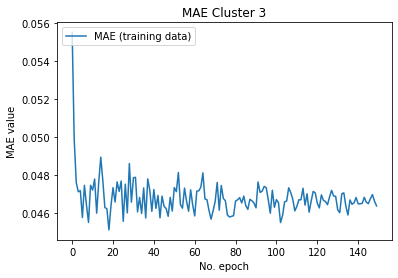

In [28]:
import matplotlib.pyplot as plt

plt.plot(hist.history['mae'], label='MAE (training data)')
# plt.plot(hist.history['val_mae'], label='MAE (validation data)')

plt.title('MAE Cluster 3')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

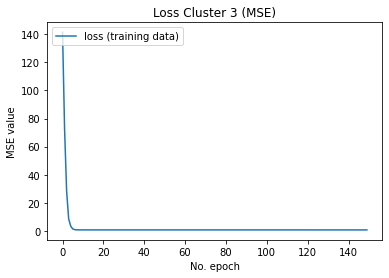

In [29]:
plt.plot(hist.history['loss'], label='loss (training data)')
# plt.plot(hist.history['val_loss'], label='loss (validation data)')

plt.title("Loss Cluster 3 (MSE)")
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [30]:
prediksi=model.predict(np.array(series_t))
prediksi

array([[0.04519163],
       [0.04519163],
       [0.04519163],
       [0.04519163],
       [0.04519163],
       [0.04519163]], dtype=float32)

In [31]:
prediksi=prediksi.flatten()

In [32]:
hasil=np.concatenate((series,prediksi))

In [33]:
hasil

array([2.77593453e-02, 4.03671754e-02, 6.84583057e-02, 6.35921256e-02,
       8.51581509e-03, 2.36120327e-02, 1.91329352e-02, 4.96571555e-02,
       3.64963504e-02, 5.67905331e-02, 4.73346605e-02, 4.21919929e-02,
       5.18690555e-02, 1.06890069e-01, 5.07078080e-02, 6.14355231e-02,
       2.52709578e-02, 8.62641009e-03, 1.00000000e+00, 3.97589029e-02,
       3.43950453e-02, 4.68922805e-02, 2.43861977e-02, 4.28002654e-02,
       7.01725282e-02, 5.82835656e-02, 7.31032957e-02, 5.34726830e-02,
       5.60163681e-02, 2.20637027e-02, 3.67175404e-02, 5.81176731e-02,
       1.20548551e-02, 2.76487503e-04, 2.76487503e-04, 3.87082504e-04,
       2.76487503e-04, 2.76487503e-04, 2.76487503e-04, 2.76487503e-04,
       2.76487503e-04, 2.76487503e-04, 2.76487503e-04, 2.76487503e-04,
       2.76487503e-04, 2.76487503e-04, 0.00000000e+00, 2.76487503e-04,
       2.76487503e-04, 0.00000000e+00, 2.76487503e-04, 2.76487503e-04,
       2.76487503e-04, 2.76487503e-04, 4.51916270e-02, 4.51916270e-02,
      

In [34]:
prediksi

array([0.04519163, 0.04519163, 0.04519163, 0.04519163, 0.04519163,
       0.04519163], dtype=float32)

In [35]:
#Manipulasi Cluster 3
# series_t [1] = 0.03
# series_t [2] = 0.03

In [36]:
data_asli = np.concatenate((series,series_t))

[]

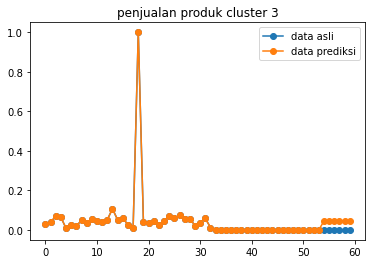

In [37]:
plt.plot(data_asli,marker = 'o',label='data asli')
plt.plot(hasil,marker = 'o',label='data prediksi')
plt.title('penjualan produk cluster 3')
plt.legend()
plt.plot()

In [38]:
model.save('cluster3_newdata.h5')

# C2

In [39]:
#next kita ubah bentuk data nya dari yang tadinya kesamping jadi ke bawah, tapi pertama mau aku drop dulu cluster sama kode produknya
c2=c2.drop(columns=['KodeBarang','cluster'])
c2
c2_t =c2_t.drop(columns=['KodeBarang','cluster'])
c2_t

,bulan 1,bulan 2,bulan 3,bulan 4,bulan 5,bulan 6
17,3032,5133,3205,6217,3336,856
30,890,1638,775,808,1068,4565
48,2713,2733,2338,1957,2022,2457
82,12900,13667,9523,2514,2749,840


In [104]:
c2

,1,2,3,4,5,6,7,8,9,10,...,45,46,47,48,49,50,51,52,53,54
17,5307,3231,4562,372,4159,1853,6741,2884,5721,2573,...,2184,3210,2794,1243,2619,3888,1659,1971,2877,2138
30,3027,2097,6983,1318,2965,840,3094,1826,3463,5040,...,792,620,1265,910,713,867,630,860,758,747
48,2934,1481,1946,2130,2152,1563,1975,2426,1844,1944,...,1717,1858,1922,1731,2472,1846,2291,2199,1849,2180
82,0,33,2,0,3,27,23,9,7,-2,...,5597,2573,5687,5273,3236,8910,4665,7150,6726,5124


In [40]:
#next, buat dia kayak mejeneng time series seperti biasanya, which is datanya ke bawah, tapi di average per tanggal 
new_c2=[]
time=[]
for idx,a in enumerate(c2):
    new_c2.append(c2[a].mean())
    time.append(idx)


In [41]:
new_c2_t=[]
time_t=[]
i = 54
for idx,a in enumerate(c2_t):
    new_c2_t.append(c2_t[a].mean())
    time.append(i)
    i+=1
new_c2_t

[4883.75, 5792.75, 3960.25, 2874.0, 2293.75, 2179.5]

In [42]:
new_c2

[2817.0,
 1710.5,
 3373.25,
 955.0,
 2319.75,
 1070.75,
 2958.25,
 1786.25,
 2758.75,
 2388.75,
 2227.5,
 1751.75,
 3112.0,
 931.75,
 2626.5,
 2518.75,
 1584.25,
 2140.5,
 2179.75,
 1448.25,
 2123.0,
 1413.75,
 1921.0,
 1041.5,
 1660.5,
 2352.5,
 1685.75,
 1586.75,
 1766.5,
 2096.5,
 1461.0,
 1571.5,
 1316.25,
 1488.25,
 1714.0,
 915.5,
 1929.0,
 1736.0,
 1836.25,
 1776.25,
 1141.75,
 1651.0,
 1844.5,
 1842.0,
 2572.5,
 2065.25,
 2917.0,
 2289.25,
 2260.0,
 3877.75,
 2311.25,
 3045.0,
 3052.5,
 2547.25]

In [43]:
#normalisasi, karena gap nya ada yang sampe ribuan, biar lebih gampang tugas ann nya
series=new_c2
min = np.min(series)
max = np.max(series)
series = series - min
series = series / (max-min)
time = np.array(time)

In [44]:
series

array([0.64191071, 0.26837708, 0.82969027, 0.01333446, 0.47404844,
       0.05240949, 0.68959406, 0.29394886, 0.6222466 , 0.49734155,
       0.44290657, 0.2823023 , 0.74149717, 0.00548569, 0.57760149,
       0.54122711, 0.22575745, 0.41353701, 0.42678707, 0.1798464 ,
       0.40762934, 0.16819985, 0.33943793, 0.04253524, 0.25149802,
       0.48510423, 0.26002194, 0.2266014 , 0.28728163, 0.39868343,
       0.18415056, 0.22145329, 0.13528568, 0.19334965, 0.26955861,
       0.        , 0.34213858, 0.2769854 , 0.31082792, 0.29057304,
       0.07637775, 0.248291  , 0.31361296, 0.31276901, 0.5593721 ,
       0.38813402, 0.67566883, 0.46375222, 0.45387796, 1.        ,
       0.471179  , 0.71887923, 0.72141109, 0.55084817])

In [45]:
series_t=new_c2_t
min = np.min(series_t)
max = np.max(series_t)
series_t = series_t - min
series_t = series_t / (max-min)
time = np.array(time)

In [46]:
series_t

array([0.74842593, 1.        , 0.49283886, 0.19220923, 0.03161973,
       0.        ])

In [47]:
split_time = 3 # ini berapa bulan terkahir yang mau di potong buat pengujian?

time_train = time
x_train =  series


In [48]:
#buat data biar dibagi per window, jadi me masang masangkan waktu dan value,
window_size = 2
batch_size = 2
shuffle_buffer_size = 10

train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
# valid_set = windowed_dataset(x_valid, window_size, batch_size, shuffle_buffer_size)

In [49]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(2, input_shape=[None, 1]),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(512, activation='relu',kernel_regularizer=tf.keras.regularizers.l1(l1=0.01)),
        tf.keras.layers.Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='relu')
    ])

    #the blstm part

In [50]:
#Using mae and mse
model.compile(optimizer=tf.keras.optimizers.Adam(),metrics=['mae'],loss='mse')
model.summary()
hist=model.fit(train_set ,epochs=150)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, None, 2)           4         
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 128)         34304     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                41216     
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              66560     
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)              

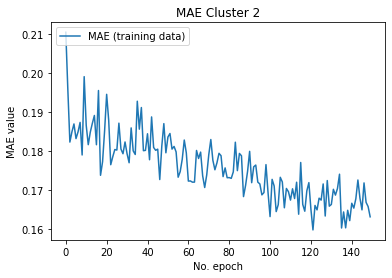

In [51]:
import matplotlib.pyplot as plt
plt.plot(hist.history['mae'], label='MAE (training data)')
# plt.plot(hist.history['val_mae'], label='MAE (validation data)')

plt.title("MAE Cluster 2")
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

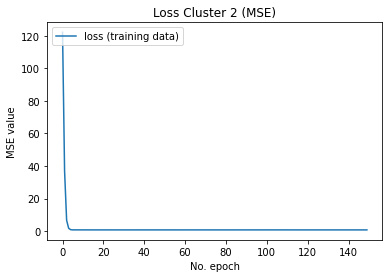

In [52]:
plt.plot(hist.history['loss'], label='loss (training data)')
# plt.plot(hist.history['val_loss'], label='loss (validation data)')

plt.title("Loss Cluster 2 (MSE)")
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [53]:
prediksi=model.predict(np.array(series_t))
prediksi

array([[0.44779903],
       [0.44779998],
       [0.4477981 ],
       [0.447797  ],
       [0.44779646],
       [0.44779634]], dtype=float32)

In [54]:
prediksi=prediksi.flatten()

In [55]:
#Manipulasi Cluster 2
# series_t[1] = 0.5789881
# series_t[2] = 0.3878771
# prediksi[1] = 0.5598221
data_asli = np.concatenate((series,series_t))

In [56]:
hasil=np.concatenate((series,prediksi))

[]

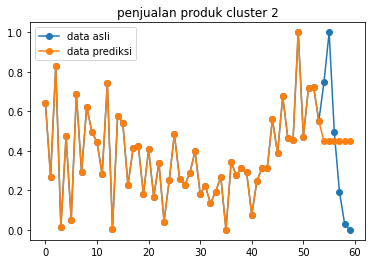

In [57]:
plt.plot(data_asli,marker = 'o',label='data asli')
plt.plot(hasil,marker = 'o',label='data prediksi')
plt.title('penjualan produk cluster 2')
plt.legend()
plt.plot()

In [58]:
model.save('cluster2_newdata.h5')

# C1

In [59]:
#next kita ubah bentuk data nya dari yang tadinya kesamping jadi ke bawah, tapi pertama mau aku drop dulu cluster sama kode produknya
c1=c1.drop(columns=['KodeBarang','cluster'])
c1
c1_t = c1_t.drop(columns=['KodeBarang','cluster'])
c1_t

,bulan 1,bulan 2,bulan 3,bulan 4,bulan 5,bulan 6
1,573,340,441,270,488,240
3,162,82,72,98,126,120
5,93,107,74,87,118,79
7,485,292,622,366,481,489
19,0,0,0,0,0,0
20,21,174,359,230,388,34
24,1079,302,1596,9,114,28
29,0,0,0,450,0,0
31,301,254,294,122,161,216
32,107,82,112,119,80,150


In [60]:
#next, buat dia kayak mejeneng time series seperti biasanya, which is datanya ke bawah, tapi di average per tanggal 
new_c1=[]
time=[]
for idx,a in enumerate(c1):
    new_c1.append(c1[a].mean())
    time.append(idx)


In [61]:
time

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53]

In [62]:
new_c1_t=[]
time_t=[]
i = 54
for idx,a in enumerate(c1_t):
    new_c1_t.append(c1_t[a].mean())
    time_t.append(i)
    i+=1
new_c1_t

[413.7741935483871,
 448.80645161290323,
 400.19354838709677,
 355.7096774193548,
 354.03225806451616,
 323.741935483871]

In [63]:
time_t

[54, 55, 56, 57, 58, 59]

In [64]:
#normalisasi, karena gap nya ada yang sampe ribuan, biar lebih gampang tugas ann nya
series=new_c1
min = np.min(series)
max = np.max(series)
series = series - min
series = series / (max-min)
time = np.array(time)

In [65]:
series_t=new_c1_t
min = np.min(series_t)
max = np.max(series_t)
series_t = series_t - min
series_t = series_t / (max-min)
time_t = np.array(time_t)

In [66]:
series_t

array([0.71988651, 1.        , 0.61129739, 0.25561001, 0.24219758,
       0.        ])

In [67]:
split_time = 3 # ini berapa bulan terkahir yang mau di potong buat pengujian?

time_train = time
x_train =  series

In [68]:
#buat data biar dibagi per window, jadi me masang masangkan waktu dan value,
window_size = 2
batch_size = 2
shuffle_buffer_size = 10

train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
# valid_set = windowed_dataset(x_valid, window_size, batch_size, shuffle_buffer_size)

In [69]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(2, input_shape=[None, 1]),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(512, activation='relu',kernel_regularizer=tf.keras.regularizers.l1(l1=0.01)),
        tf.keras.layers.Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='relu')
    ])

    #the blstm part

In [70]:
#Using mae and mse
model.compile(optimizer=tf.keras.optimizers.Adam(),metrics=['mae'],loss='mse')
model.summary()
hist=model.fit(train_set,epochs=150)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, None, 2)           4         
_________________________________________________________________
bidirectional_4 (Bidirection (None, None, 128)         34304     
_________________________________________________________________
bidirectional_5 (Bidirection (None, 64)                41216     
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 1024)              66560     
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)              

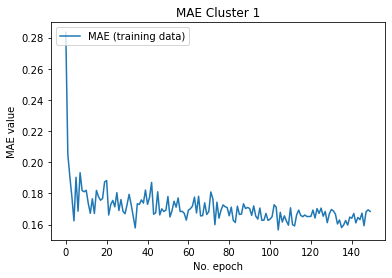

In [71]:
import matplotlib.pyplot as plt
plt.plot(hist.history['mae'], label='MAE (training data)')
# plt.plot(hist.history['val_mae'], label='MAE (validation data)')

plt.title("MAE Cluster 1")
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

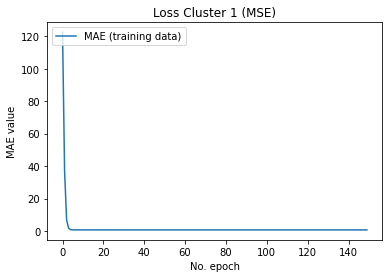

In [72]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], label='MAE (training data)')
# plt.plot(hist.history['val_loss'], label='MAE (validation data)')

plt.title("Loss Cluster 1 (MSE)")
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [73]:
prediksi=model.predict(np.array(series_t))
prediksi

array([[0.4454866 ],
       [0.44548658],
       [0.4454866 ],
       [0.44548666],
       [0.44548666],
       [0.4454867 ]], dtype=float32)

In [74]:
prediksi=prediksi.flatten()

In [75]:
#Manipulasi Cluster 1
# prediksi[1] = 0.5598221
# prediksi[2] = 0.3878771
# series_t[1] = 0.576327
# series_t[2] = 0.411212

In [76]:
hasil=np.concatenate((series,prediksi))

In [77]:

series_t

array([0.71988651, 1.        , 0.61129739, 0.25561001, 0.24219758,
       0.        ])

In [78]:
data_asli = np.concatenate((series,series_t))

[]

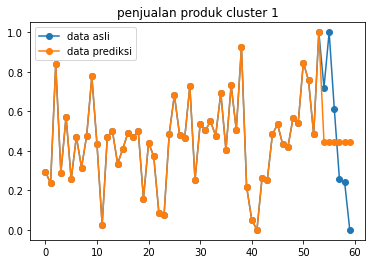

In [79]:
plt.plot(data_asli,marker = 'o',label='data asli')
plt.plot(hasil,marker = 'o',label='data prediksi')
plt.title('penjualan produk cluster 1')
plt.legend()
plt.plot()

In [80]:
model.save('cluster1_newdata.h5')

# C0

In [81]:
#next kita ubah bentuk data nya dari yang tadinya kesamping jadi ke bawah, tapi pertama mau aku drop dulu cluster sama kode produknya
c0=c0.drop(columns=['KodeBarang','cluster'])
c0
c0_t = c0_t.drop(columns=['KodeBarang','cluster'])
c0_t

,bulan 1,bulan 2,bulan 3,bulan 4,bulan 5,bulan 6
0,5,12,8,14,40,40
2,27,5,26,34,40,56
4,23,20,9,5,22,6
6,0,-3,3,2,2,0
8,69,46,94,9,73,14
...,...,...,...,...,...,...
98,0,0,0,0,0,0
100,8,48,72,64,81,22
101,138,14,12,21,25,10
102,60,103,39,87,276,40


In [82]:
# c0_u = pd.DataFrame([c0,c0_t])

In [83]:
#next, buat dia kayak mejeneng time series seperti biasanya, which is datanya ke bawah, tapi di average per tanggal 
new_c0=[]
time=[]
for idx,a in enumerate(c0):
    new_c0.append(c0[a].mean())
    time.append(idx)


In [84]:
new_c0_t=[]
time_t=[]
i = 54
for idx,a in enumerate(c0_t):
    new_c0_t.append(c0_t[a].mean())
    time_t.append(i)
    i+=1

In [85]:
new_c0

[61.5,
 49.67142857142857,
 52.98571428571429,
 41.07142857142857,
 52.77142857142857,
 34.042857142857144,
 56.94285714285714,
 55.74285714285714,
 57.9,
 77.15714285714286,
 53.58571428571429,
 40.17142857142857,
 53.42857142857143,
 62.9,
 50.7,
 51.128571428571426,
 47.55714285714286,
 44.214285714285715,
 43.81428571428572,
 37.3,
 47.42857142857143,
 48.385714285714286,
 36.5,
 27.87142857142857,
 48.41428571428571,
 42.97142857142857,
 44.8,
 44.2,
 41.371428571428574,
 29.942857142857143,
 47.128571428571426,
 38.75714285714286,
 42.67142857142857,
 38.457142857142856,
 37.25714285714286,
 35.07142857142857,
 50.042857142857144,
 32.44285714285714,
 43.75714285714286,
 36.371428571428574,
 19.32857142857143,
 20.1,
 35.48571428571429,
 32.24285714285714,
 28.414285714285715,
 27.614285714285714,
 34.08571428571429,
 31.7,
 41.07142857142857,
 24.814285714285713,
 35.57142857142857,
 29.928571428571427,
 24.185714285714287,
 25.84285714285714]

In [86]:
#normalisasi, karena gap nya ada yang sampe ribuan, biar lebih gampang tugas ann nya
series=new_c0
min = np.min(series)
max = np.max(series)
series = series - min
series = series / (max-min)
time = np.array(time)

In [87]:
series_t=new_c0_t
min = np.min(series_t)
max = np.max(series_t)
series_t = series_t - min
series_t = series_t / (max-min)
time_t = np.array(time_t)


In [88]:
series_t

array([0.36779911, 0.32496307, 0.28064993, 0.79320532, 1.        ,
       0.        ])

In [89]:
split_time = 3 # ini berapa bulan terkahir yang mau di potong buat pengujian?

time_train = time
x_train =  series

In [90]:
#buat data biar dibagi per window, jadi me masang masangkan waktu dan value,
window_size = 2
batch_size = 2
shuffle_buffer_size = 10

train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
# valid_set = windowed_dataset(x_valid, window_size, batch_size, shuffle_buffer_size)

In [91]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(2, input_shape=[None, 1]),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(512, activation='relu',kernel_regularizer=tf.keras.regularizers.l1(l1=0.01)),
        tf.keras.layers.Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='relu')
    ])

    #the blstm part

In [92]:
#Using mae and mse
model.compile(optimizer=tf.keras.optimizers.Adam(),metrics=['mae'],loss='mse')
model.summary()
hist=model.fit(train_set,epochs=150)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, None, 2)           4         
_________________________________________________________________
bidirectional_6 (Bidirection (None, None, 128)         34304     
_________________________________________________________________
bidirectional_7 (Bidirection (None, 64)                41216     
_________________________________________________________________
flatten_3 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 1024)              66560     
_________________________________________________________________
dropout_6 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)              

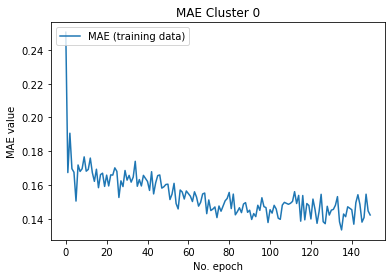

In [93]:
import matplotlib.pyplot as plt
plt.plot(hist.history['mae'], label='MAE (training data)')
# plt.plot(hist.history['val_mae'], label='MAE (validation data)')

plt.title("MAE Cluster 0")
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

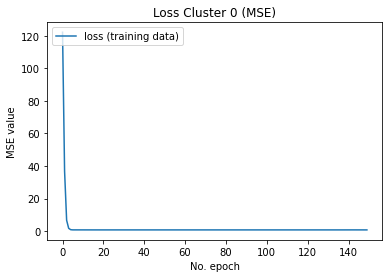

In [94]:
plt.plot(hist.history['loss'], label='loss (training data)')
# plt.plot(hist.history['val_loss'], label='loss (validation data)')

plt.title("Loss Cluster 0 (MSE)")
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [95]:
series_t

array([0.36779911, 0.32496307, 0.28064993, 0.79320532, 1.        ,
       0.        ])

In [96]:
prediksi=model.predict(np.array(series_t))
prediksi

array([[0.32835293],
       [0.32835308],
       [0.32835317],
       [0.3283517 ],
       [0.32835105],
       [0.32835385]], dtype=float32)

In [97]:
prediksi=prediksi.flatten()

In [98]:
series_t

array([0.36779911, 0.32496307, 0.28064993, 0.79320532, 1.        ,
       0.        ])

In [99]:
#Manipulasi Cluster 0
# prediksi[0] = 0.9728832
# prediksi[1] = 0.5588829
# prediksi[2] = 0.1112121

In [100]:
hasil=np.concatenate((series,prediksi))

In [101]:
data_asli = np.concatenate((series,series_t))

[]

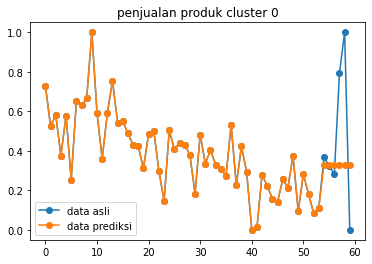

In [102]:
plt.plot(data_asli,marker = 'o',label='data asli')
plt.plot(hasil,marker = 'o',label='data prediksi')
plt.title('penjualan produk cluster 0')
plt.legend()
plt.plot()

In [103]:
model.save('cluster0_newdata.h5')